# About dataset

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Content

Each row represents a customer, each column contains customer’s attributes

### The dataset includes information about

- Customers who have left within the last month : Churn
- Services that each customer has signed up for : phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information : tenure, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers : gender, age range, and if they have partners and dependents

# Let's Start an Exploratory Data Analysis 

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

data = pd.read_csv('Telco-Customer-Churn-Data.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Replacing blanks in TotalCharges with 0 as tenure is 0 and TotalCharges is not recorded.**

In [5]:
data['TotalCharges'] = data['TotalCharges'].replace(' ','0')


**Converting Dtype of TotalCharges to float.**

In [6]:
data['TotalCharges'] = data['TotalCharges'].astype('float')

**Checking for null values**

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Lets Check out some descriptive statistics

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Checking For Duplicates**

In [9]:
data['customerID'].duplicated().sum()

0

**Converting SeniorCitizen column from 1's and 0's to Yes and No.**

In [10]:
def convert_values(value):
    if value == 0:
        return 'No'
    else:
        return 'Yes'

data['SeniorCitizen'] = data['SeniorCitizen'].apply(convert_values)

**Q1. How many customers have churned ?**

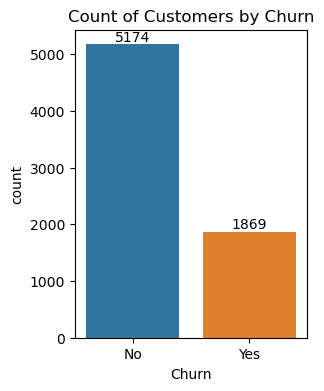

In [14]:
#Plotting a countplot for churned customers 
plt.figure(figsize = (3,4))
ax = sns.countplot(x = 'Churn', data = data)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

**Q2. Percentage of customers churned ?**

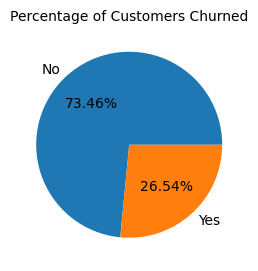

In [17]:
#Plotting a piechart for churned customers
plt.figure(figsize = (3,4))
gb = data.groupby('Churn').agg({'Churn' : "count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = '%1.2f%%')
plt.title("Percentage of Customers Churned", fontsize = 10)
plt.show()

**From the pie chart we can conclude that 26.54% of our customers have churned out.**

## Lets Explore the reason

**Q3. Does Gender affect the churning ?**

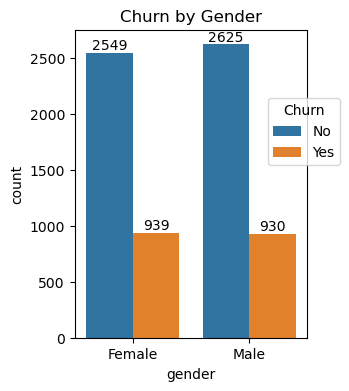

In [28]:
#Plotting a countplot of gender to figure out the churning in men and women
plt.figure(figsize = (3,4))
ax = sns.countplot(x = "gender", data = data, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Gender")
plt.legend(title = 'Churn', bbox_to_anchor = (0.8,0.8)) #Customized Legend Location
plt.show()

**Q4. How does SeniorCitizen effect Churn rate ?**

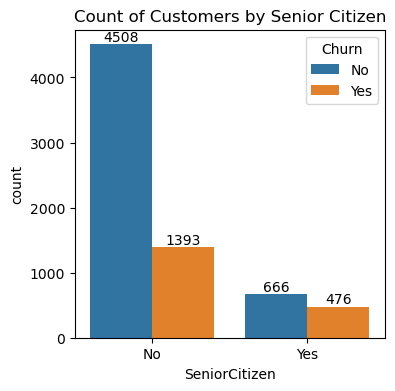

In [32]:
#Plotting the countplot for SeniorCitizen 
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Count of Customers by Senior Citizen")
plt.show()

**Plotting stacked bar chart to vizualize Churn percentage by SeniorCitizen.**

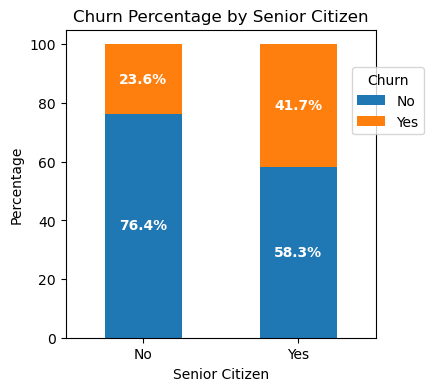

In [40]:
senior_churn = data.groupby("SeniorCitizen")['Churn'].value_counts(normalize=True).unstack() * 100

# Plotting stacked bar chart
fig, ax = plt.subplots(figsize=(4, 4))
senior_churn.plot(kind='bar', stacked=True, ax=ax)

# Add percentage labels
for container, churn_type in zip(ax.containers, senior_churn.columns):
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center', va='center', fontsize=10, color='white', fontweight='bold'
            )

plt.title("Churn Percentage by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", labels=["No", "Yes"], bbox_to_anchor = (0.9,0.9))
plt.xticks(rotation=0)
plt.show()


**Higher Percentage of Senior Citizen have churned, even though the number of senior citizen is lesser.**

**Q5. How does Tenure effect Churn ?**

C:\Users\tuhin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


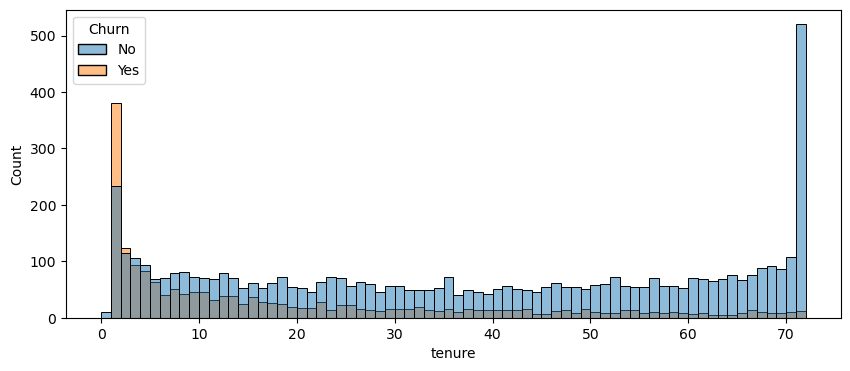

In [41]:
#Plotting a histogram for tenure

plt.figure(figsize = (10,4))
sns.histplot(x = 'tenure', data = data, bins = 72, hue = 'Churn')
plt.show()

**People who have used our services for long time have stayed compared to those who have used service for 1 to 2 months.
People with lesser tenure have churned more.**

**Q5. How does the Contract type effect churn rate?**

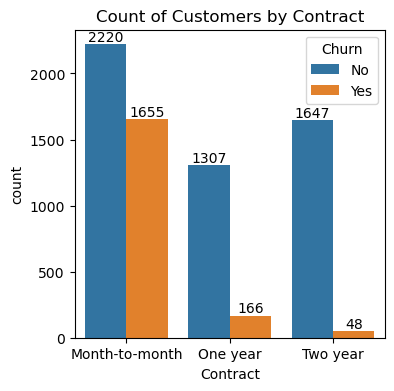

In [43]:
#Plotting a countplot of customer by contract
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract")
plt.show()


**People with month to month contract are more likely to churned than from those with longer contracts.**

In [45]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Q6. How does each service effect churn rate of customers ?**

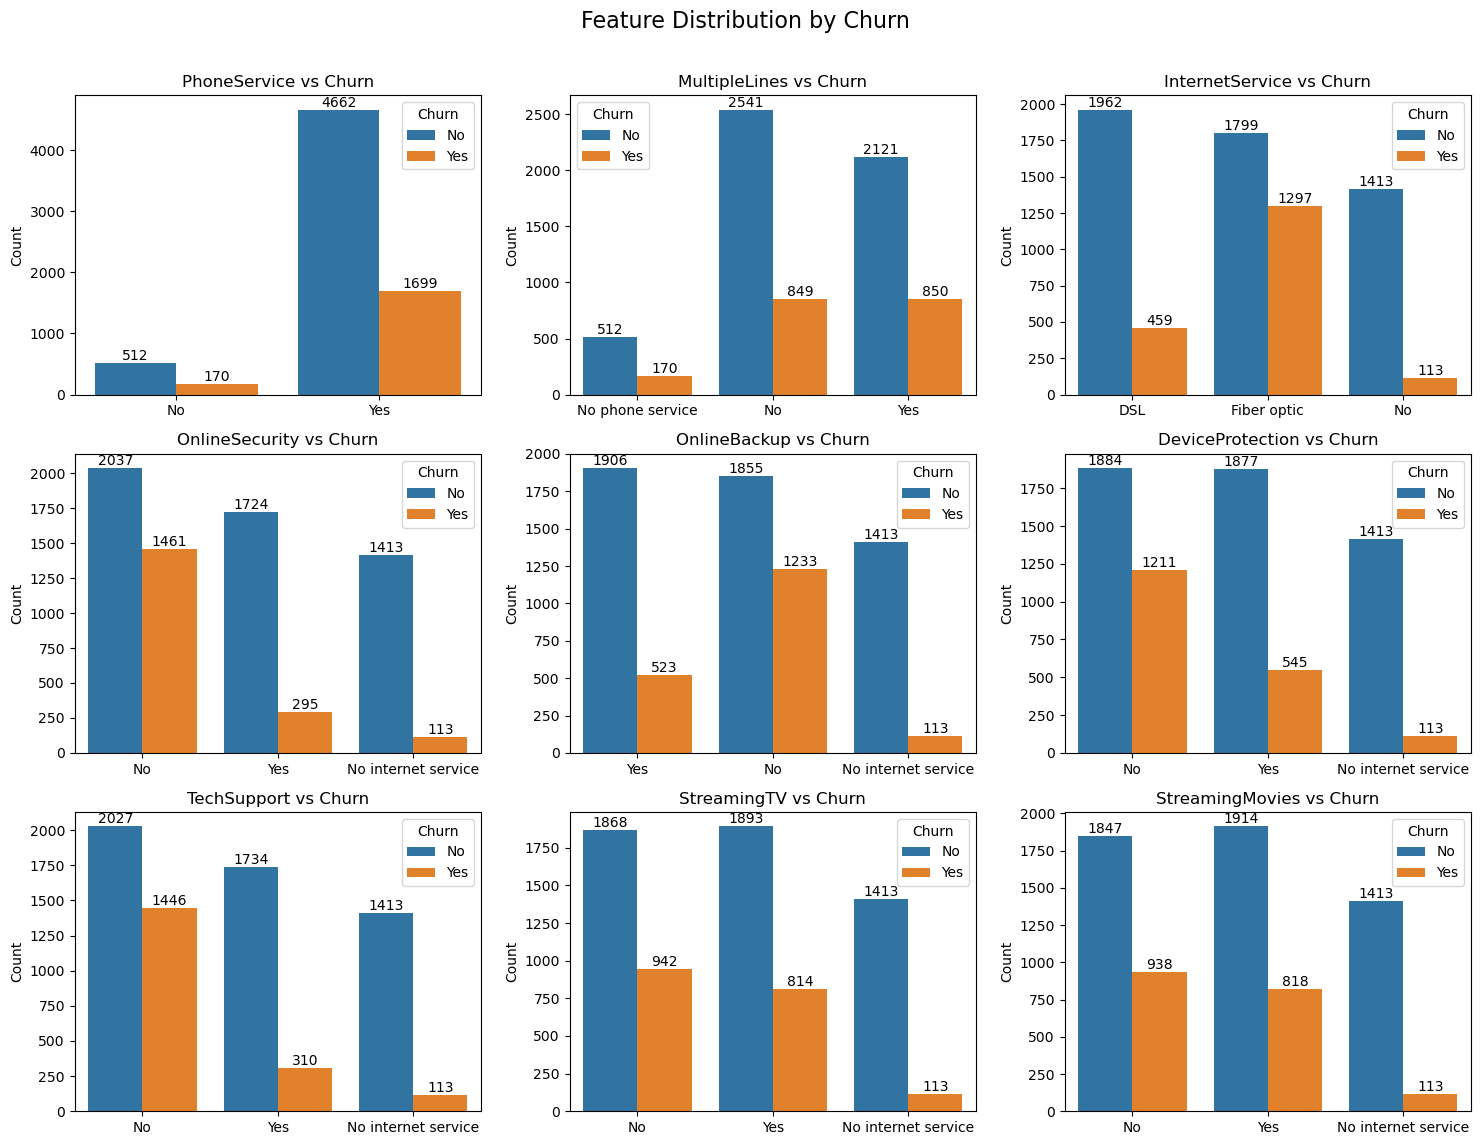

In [46]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

#plotting subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Feature Distribution by Churn", fontsize=16)

for col, ax in zip(columns, axes.flatten()):
    sns.countplot(x=col, data=data, hue="Churn", ax=ax)
    ax.set_title(f"{col} vs Churn")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

**Customers without additional services like OnlineSecurity, OnlineBackup, and TechSupport exhibit a higher churn rate. Internet service type plays a significant role, with fiber optic users showing more churn compared to DSL. Streaming services and multiple lines have a less pronounced impact on churn.**

**Q7. Payment Method vs Churn**

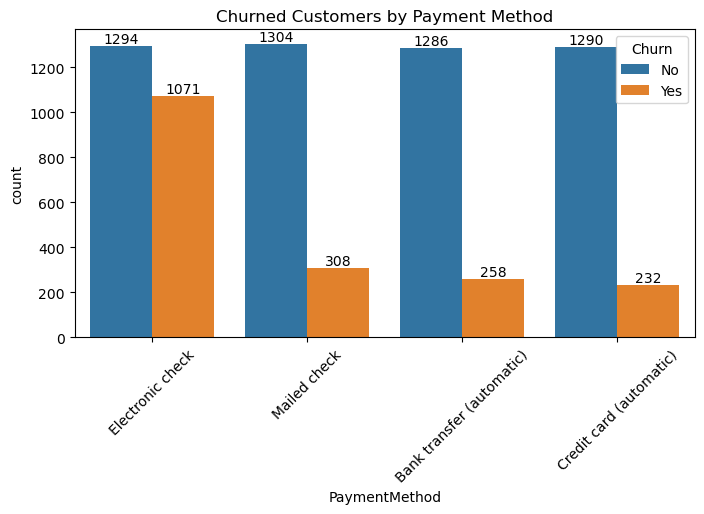

In [48]:
#plotting Countplot 
plt.figure(figsize = (8,4))
ax = sns.countplot(x = "PaymentMethod", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

**Customers is likely to churn when he is using electronic check as payment method**